---
# Zadaća 7
##### Rok za predaju: 5. svibnja, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Borna Gajić

---

In [628]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch

le = OrdinalEncoder()

## Zadatak 1

Zadana vam je neuronska mreža (slika ispod). Aktivacijska funkcija $g(.)$ u skrivenom sloju je sigmoid funkcija. Pokažite da postoji ekvivalentna neuronska mreža koja u skrivenom sloju umjesto sigmoid aktivacijske funkcije ima $tanh$ aktivacijsku funkciju. Raspišite to. 



<img src="./zadatak1.png" width="50%">
<center>Slika 2. model neuronske mreže</center>


Pomoć (pratite sljedeće korake) : 
- Raspišite kako izgleda aktivacija $a_1^{(3)}$ prateći oznake uvedene gore
- Pronađite povezanost između funkcije sigmoid i $tanh$ (raspišite)
- Kada dvije gornje informacije spojite, imate sljedeće - ako je $y_T = a_1^{(3)}$ rezultat dobiven neuronskom mrežom u kojoj ste koristili $tanh$ funkciju, a $y_S = a_1^{(3)}$ rezultat dobiven neuronskom mrežom u kojoj ste koristili sigmoid, tada možete pronaći vezu između ta dva rezultata tako da parametre jedne mreže zapišete kao linearnu kombinaciju parametara druge mreže. <br>

Raspišimo funkciju $tanh$  
  
$tanh(x) = \dfrac{e^x - e^{-x}}{e^x + e^{-x}} = \dfrac{e^x + e^{-x}}{e^x + e^{-x}} - \dfrac{2e^{-x}}{e^x + e^{-x}} = 1 - \dfrac{2}{1 + e^{2x}}$  
  
Raspišimo funkciju $\sigma$  
  
$\sigma(x) = \dfrac{1}{1 + e^{-x}} = \dfrac{1}{\dfrac{1 + e^x}{e^x}} = 1 - \dfrac{1}{1 + e^x}$  
Sve zajedno
  
$tanh\left(\dfrac{x}{2}\right) = 2\sigma(x) - 1 \iff \sigma(x) = \dfrac{tanh\left(\dfrac{x}{2}\right) + 1}{2}$  

Iz prošle ekvivalencije možemo zaključiti da će dvije neuronske mreže, gdje jedna za aktivacijsku funkciju ima $\sigma$ dok druga ima $tanh$, biti jednake (imati iste izlaze) jer jednu aktivacijsku funkciju možemo dobiti kao linearnu kombinaciju druge.

---
## Zadatak 2
Modelirajte logčki 'XOR'. Nacrtajte neuronsku mrežu i zapišite parametre $\theta$ s kojima bi dobro modelirali ponašanje operatora.

<img src="./zadatak1.png" width="50%">

Težine:

$w_1^{(1)} = [-10, 20, 20] \implies OR$  
$w_2^{(1)} = [30, -20, -20] \implies NAND$  
  
$w_1^{(2)} = [-30, 20, 20] \implies AND$

Rezultati aktivacijskih funkcija:

$a_1^{(1)} = -10 + 20 \cdot x_1 + 20 \cdot x_2$  
$a_2^{(1)} = 10 - 20 \cdot x_1 - 20 \cdot x_2$  
  
$a_1^{(2)} = 30 + 20 \cdot x_1 + 20 \cdot x_2$

---
## Zadatak 3

Neka je zadana kriterijska funkcija $J(\theta) = - \sum\limits_{i=1}^{m} [y^{(i)}\log{h_{\theta}(x^{(i)}) + (1-y^{(i)})\log{(1-h_{\theta}(x^{(i)})})}],$ gdje je za svaki $i$, $y^{(i)}$ stvarna vrijednost podatka, a $h_{\theta}(x^{(i)})$ predikcija. <br> Ako su neuroni u završnom sloju označeni sa $a_k$, pokažite da je derivacije te funkcije s obzirom na $a_k$, sa sigmoid aktivacijskom funkcijom zadovoljava $\frac{\partial J}{\partial a_k} = h_{\theta}(x^{(k)}) - y^{(k)}$. <br> (Uzmite kriterijsku funkciju za jedan podatak $i$). 

Odredimo derivaciju model funkcije:  
  
$h'_\theta(x^{(i)}) = \left(\dfrac{1}{1 + e^{-x}}\right)' = - \dfrac{e^{-x}}{(1 + e^{-x})^2}$  
  
$h'_\theta(x^{(i)}) = \dfrac{e^{-x}}{(1 + e^{-x})^2} = \dfrac{1}{1 + e^{-x}} \cdot \dfrac{1 + e^{-x} - 1}{1 + e^{-x}} = h_\theta(x^{(i)})\cdot(1 - h_\theta(x^{(i)}))$  

To jest, vrijedi jednakost: $h'_\theta(x^{(i)}) = h_\theta(x^{(i)})(1 - h_\theta(x^{(i)}))$; označimo ju s $(*)$  
  
$\dfrac{\partial J}{\partial x^{(k)}} = \dfrac{\partial(y^{(k)} \cdot log(h_{\theta}(x^{(k)})) + (1 - y^{(k)}) \cdot log(1-h_{\theta}(x^{(k)})))}{\partial x^{(k)}} = $  
  
$ = y^{(k)} \cdot \dfrac{1}{h_{\theta}(x^{(k)})} \cdot h_{\theta}'(x^{(k)}) + (1 - y^{(k)}) \cdot \dfrac{-1}{1 - h_{\theta}(x^{k})} \cdot h_{\theta}'(x^{(k)}) = $ 
  
$ = h_{\theta}'(x^{(k)}) \cdot (\dfrac{y^{(k)}}{h_{\theta}(x^{(k)})} - \dfrac{1 - y^{(k)}}{1 - h_{\theta}'(x^{(k)})}) = $  

$ = h_{\theta}'(x^{(k)}) \cdot \dfrac{y^{(k)} - y^{(k)} \cdot h_{\theta}(x^{(k)}) - h_{\theta}(x^{(k)}) + y^{(k)} \cdot h_{\theta}(x^{(k)})}{h_{\theta}(x^{(k)})\cdot(1-h_{\theta}(x^{(k)}))} \stackrel{(*)}{\iff} -(-h_{\theta}(x^{(k)}) + y^{k}) = h_{\theta}(x^{(k)}) - y^{k}$  

---
## Zadatak 4 
Zadani su vam regresijski podaci `X,y`.  Proučite dimenzije podataka i odredite arhitekturu mreže i skicirajte ju (priložite sliku). Proizvoljno odredite aktivacijske funkcije i funkciju pogreške. Zatim napravite vektore težina odgovarajuće dimenzije (generirajte slučajne vektore) i napravite propagaciju unaprijed.  

Napomena: Propagaciju unaprijed napravite ručno, koristeći `numpy`

In [795]:
X, y = make_regression(n_samples = 300, n_features = 6, random_state=102)

y = y.reshape(-1, 1)

print("dim X = {}, dim y = {}".format(X.shape, y.shape))

dim X = (300, 6), dim y = (300, 1)


In [796]:
inputSize = X.shape[1]
hiddenSize = 3
outputSize = y.shape[1]

Aktivacijska i cost funkcija

In [797]:
def leaky_ReLU (X, alpha = 0):
    return np.where(X > alpha * X, X, alpha * X)
    
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def cost_function (y, y_pred):
    return 0.5 * np.square(y_pred - y).sum()

Vektori težina za našu neuronsku mrežu

In [798]:
weight_1 = np.random.randn(inputSize, hiddenSize)
weight_2 = np.random.randn(hiddenSize, outputSize)

print("dim weight_1 = {}".format(weight_1.shape))
print("dim weight_2 = {}".format(weight_2.shape))

dim weight_1 = (6, 3)
dim weight_2 = (3, 1)


In [799]:
# Forward propagation
a2 = X.dot(weight_1)
z2 = leaky_ReLU(a2)
y_pred = z2.dot(weight_2)

---

## Zadatak 5

Ovaj skup skup sadrži $8124$ uzoraka gljiva i njihove $23$ karakteristike. Svakoj gljivi je pridružena klasa $e$ kao *jestiva*(*engl.* edible), $p$ kao *otvorna*(*engl. poisonous*) ili $u$ kao *nepoznato*(*unknown*). <br>
Ostale varijable su kategoričke i tipa su *boolean* ili *string*. Uglavnom su stringovi opisni. Npr. značajka $cap-shape$ može poprimiti vrijednosti 
- bell=b
- conical=c
- convex=x
- flat=f
- knobbed=k
- sunken=s

- Potrebno je upoznati se sa skupom podataka te značajke koje nisu numeričke pretvoriti u numeričke kako bismo s njima mogli dalje računati. 
- Podijelite skup podataka na skup za treniranje i testiranje.
- Odredite dimenzije podataka (odredite dimenzije ulaznog i izlaznog sloja neuronske mreže).
- Proizvoljno odaberite arhitekturu skrivenih slojeva.
- Implementirajte vašu neuronsku mrežu.
- Provedite postupak učenja neuronske mreže.
- Testirajte dobiveni model tako da ispišete neku od metrika (npr. `accuracy`).

Napomena: Model napravite i trenirajte koristeći `PyTorch`

In [789]:
mushrooms = pd.read_csv('./mushrooms.csv')
mushrooms_np = mushrooms.to_numpy()

mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Labeliranje podataka

In [506]:
for idx, feature in enumerate(mushrooms_np.T):
        mushrooms_np.T[idx] = le.fit_transform(feature.reshape(-1, 1))[:, 0]
        
mushrooms_np = mushrooms_np.astype(np.float32)
mushrooms_np

array([[1., 5., 2., ..., 2., 3., 5.],
       [0., 5., 2., ..., 3., 2., 1.],
       [0., 0., 2., ..., 3., 2., 3.],
       ...,
       [0., 2., 2., ..., 0., 1., 2.],
       [1., 3., 3., ..., 7., 4., 2.],
       [0., 5., 2., ..., 4., 1., 2.]], dtype=float32)

Svakoj gljivi je pridružena klasa $e = 0$ kao *jestiva*(*engl.* edible), $p = 1$ kao *otvorna*(*engl. poisonous*) ili $u$ kao *nepoznato*(*unknown*)

In [784]:
X = mushrooms_np[:, 1:]
y = mushrooms_np[:, 0]

Podjela na skup za treniranje i testiranje

In [508]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Kreiranje tenzora

In [697]:
X_train_T = torch.from_numpy(X_train)
y_train_T = torch.from_numpy(y_train)

X_test_T = torch.from_numpy(X_test)
y_test_T = torch.from_numpy(y_test)

In [698]:
print("dim X_train = {}".format(X_train.shape, dtype = torch.float32))
print("dim y_train = {}".format(y_train.shape, dtype = torch.float32))

dim X_train = (5443, 22)
dim y_train = (5443, 1)


In [699]:
inputSize = 22
hidden1 = 100
hidden2 = 50
hidden3 = 25
outputSize = 1

Treniranje neuronske mreže

 * Logistička regresija

In [764]:
max_iter = 1000

model = torch.nn.Sequential(
        torch.nn.Linear(inputSize, hidden1),
        torch.nn.PReLU(),
        torch.nn.Linear(hidden1, hidden2),
        torch.nn.PReLU(),
        torch.nn.Linear(hidden2, hidden3),
        torch.nn.PReLU(),
        torch.nn.Linear(hidden3, outputSize),
        torch.nn.Sigmoid())

loss_fn = torch.nn.BCELoss()
loss_values = []

learning_rate = 1e-2
for it in range(max_iter):
    y_pred = model(X_train_T)
    
    loss = loss_fn(y_pred, y_train_T)
    loss_values.append(loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for w in model.parameters():
            w -= learning_rate * w.grad

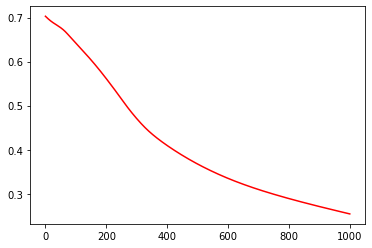

In [793]:
plt.plot(np.arange(max_iter), loss_values, c = 'r')
plt.show()

Preciznost modela

In [766]:
test_pred = model(X_test_T)
print(test_pred)

tensor([[0.1372],
        [0.9103],
        [0.9896],
        ...,
        [0.1809],
        [0.8630],
        [0.0716]], grad_fn=<SigmoidBackward>)


In [767]:
predictions = []
for x in test_pred:
    if x > 0.5: predictions.append(1)
    else: predictions.append(0)

predictions = np.array(predictions)
predictions

array([0, 1, 1, ..., 0, 1, 0])

In [768]:
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.9011562849682954


Predikcije označene u početnoj formi

In [791]:
le.fit(mushrooms_np[:, 0].reshape(-1, 1))
predictions_labeled = le.inverse_transform(predictions.reshape(-1, 1))

predictions_labeled

array([['e'],
       ['p'],
       ['p'],
       ...,
       ['e'],
       ['p'],
       ['e']], dtype=object)